# Early Stage Diabetes Risk Prediction
**By Muhammad Rizky Farhan | rizkyfarhan5@gmail.com | 2021**

## A. Introduction

**Diabetes** is a chronic, metabolic disease characterized by **elevated levels of blood glucose (or blood sugar)**, which leads over time to serious damage to heart, blood vessels, eyes, kidneys, and nerves. The most common is **type 2 diabetes**, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. **Type 1 diabetes**, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself.

### Data Set Information
Data set: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

This has been collected using direct questionnaires from the **patients of Sylhet Diabetes 
Hospital in Sylhet, Bangladesh** and approved by a doctor. Source and affiliton of the data set:
1. M M Faniqul Islam
2. Rahatara Ferdousi
3. Sadikur Rahman, and Humayra 
4. Yasmin Bushra 

### Features

This data set has **17 features** in total, which are:
#### Inputs
>Age 1.20-65 <br>
Sex 1. Male, 2.Female <br>
Polyuria 1.Yes, 2.No. <br>
Polydipsia 1.Yes, 2.No. <br>
sudden weight loss 1.Yes, 2.No. <br>
weakness 1.Yes, 2.No. <br>
Polyphagia 1.Yes, 2.No. <br>
Genital thrush 1.Yes, 2.No. <br>
visual blurring 1.Yes, 2.No. <br>
Itching 1.Yes, 2.No. <br>
Irritability 1.Yes, 2.No. <br>
delayed healing 1.Yes, 2.No. <br>
partial paresis 1.Yes, 2.No. <br>
muscle stiness 1.Yes, 2.No. <br>
Alopecia 1.Yes, 2.No. <br>
Obesity 1.Yes, 2.No. <br>

#### Labels
>Class 1.Positive, 2.Negative. <br>

### Additional Information

- **Polyura** is a condition where the body **urinates more than usual** and passes excessive or abnormally large amounts of urine each time you urinate. Polyura is defined as the frequent passage of large volumes of urine - more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.

- **Polydipsia** is a medical name for the **feeling of extreme thirstiness**. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.

- **Polyphagia** also known as hyperphagia, is the medical term for **excessive or extreme hunger**. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

- **Genital Thrush** (or candidiasis) is a common condition **caused by a type of yeast called *Candida***. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful. Many types of yeast and bacteria naturally live in the vagina and rarely cause problems.

- **Partial Paresis** involves the **weakening of a muscle or group of muscles**. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

- **Alopecia** Areata is a condition that causes **hair to fall out in small patches**, which can be unnoticeable.

### Library Import
Importing libraries that will be used throughout the processes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Loading
Loading the data set that will be used, importing the csv file to notebook.

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')
df1 = df.copy()
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### The Data Set
- Have 520 rows
- Have 17 columns
- With no missing values

## B. Data Pre-Processing

Before further processing the data, **a table summary** is made to get a brief overview of the data. The table consist of data type, null, null percentage, unique, and unique sample. The data set is known to not have any null values, so there is no need to add, remove, or fix the values of the data.

In [5]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum())/len(df[col])), 
                    df[col].nunique(), list(df[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,51,[63]
1,Gender,object,0,0.0,2,[Male]
2,Polyuria,object,0,0.0,2,[No]
3,Polydipsia,object,0,0.0,2,[No]
4,sudden weight loss,object,0,0.0,2,[No]
5,weakness,object,0,0.0,2,[No]
6,Polyphagia,object,0,0.0,2,[Yes]
7,Genital thrush,object,0,0.0,2,[Yes]
8,visual blurring,object,0,0.0,2,[Yes]
9,Itching,object,0,0.0,2,[No]


The features containing **alphabetic values is changed into numeric values** which are 1 and 0. This is done so the data can be processed later on in the modeling without any problem. The gender feature values is changed where `Male` is represented by `0` and `Female` is represented by `1`.

In [6]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})

In class feature, `Positive` values is changed into `1` and `Negative` values is changed into `0`.

In [7]:
df['class'] = df['class'].replace({'Positive':1, 'Negative':0})

The rest of the features which have values of `Yes` and `No` are then changed into `1` and `0` respectively.

In [8]:
for i in df.drop(['Gender', 'class', 'Age'], axis=1).columns:
    df[i] = df[i].replace({'Yes':1, 'No':0})

The result of the change can be seen in the **table below**, which all the values have been changed into numeric values.

In [9]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


A new feature which is `Age group` is made by grouping the `Age` feature. Age are **grouped by the range of 10 years**, starting from age 10 to 90 and up, that results in 9 categories. This new feature is made for the purpose of helping exploring and finding more informations about the data. This his feature will be exluded in the modelling and predicting process.

In [10]:
ageGroup = []
age_range = [(10,20), (20,30), (30,40), (40,50), (50,60), (60,70), (70,80), (80,90), (90,)]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

for a in df['Age']:
    for r in age_range:
        if a >= r[0] and (len(r) == 1 or a < r[1]):
            ageGroup.append(labels[age_range.index(r)])

df1['Age group'] = ageGroup
df1['Age group']

0      40-49
1      50-59
2      40-49
3      40-49
4      60-69
       ...  
515    30-39
516    40-49
517    50-59
518    30-39
519    40-49
Name: Age group, Length: 520, dtype: object

## C. Exploratory Data Analysis (EDA)

Exploratory data analysis or EDA is used in order to **understand and identify insights from the data**. The process will include several analysis and visualization of the features in the data set. FromFro the insights will then be decided if there need to be further analysis that needs to be done before building the model.

In [11]:
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age group
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40-49
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50-59
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40-49
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,40-49
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,60-69


### 1. Class Distribution
From the chart below, the data is known **to have more `Positive` than `Negative`**.

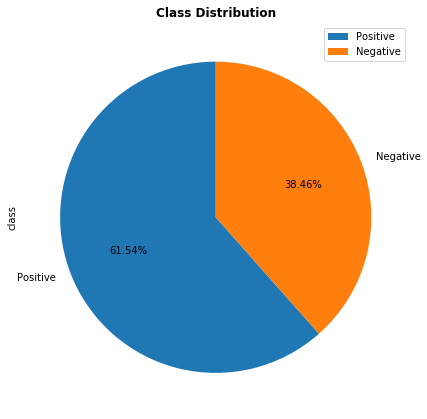

In [12]:
plt.figure(figsize=(6,6))
df1['class'].value_counts().plot(kind='pie', legend=True, labels=['Positive', 'Negative'], startangle=90, autopct='%.2f%%')
plt.title('Class Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Age Distribution
The age feature is distributed **mostly in the middle close to the age between 40 to 50**.

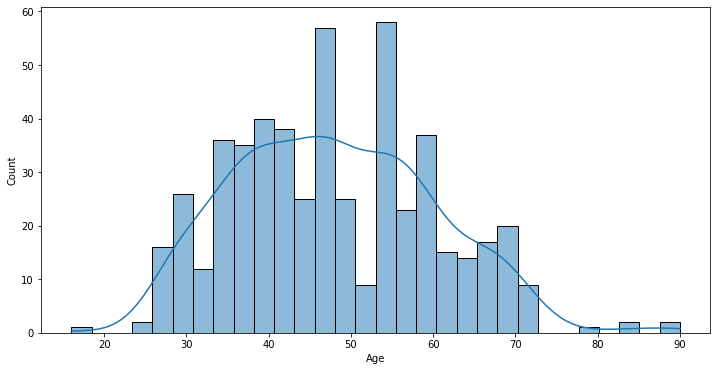

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='Age', bins=30, kde=True)

### 3. Age Group Distribution
By seeing the age group distribution plot, it is confirmed that the **age between 40-49 have the most number of people**. Followed by the age group 50-59 and 30-39.

Text(0.5, 1.0, 'Age Group Distribution')

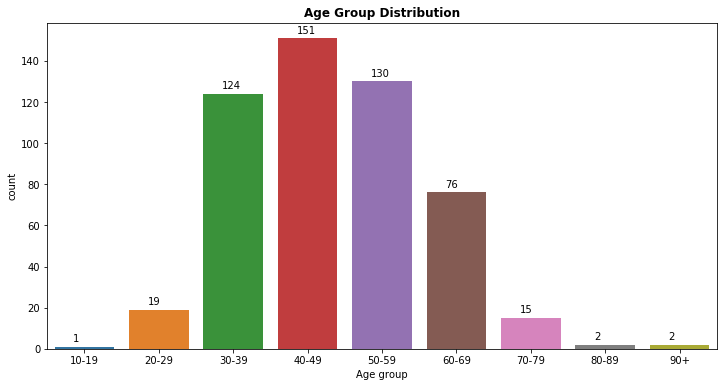

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df1, x='Age group', 
              order=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()+2.5))
plt.title('Age Group Distribution', fontweight='bold')

By using the **class as a hue**, we can see that the majority of the age group have higher number of people that is `Positive` rather dan `Negative`. In the age group of 60-69, there is more chance of having diabetes than the rest of the age group.

Text(0.5, 1.0, 'Age Group Distribution')

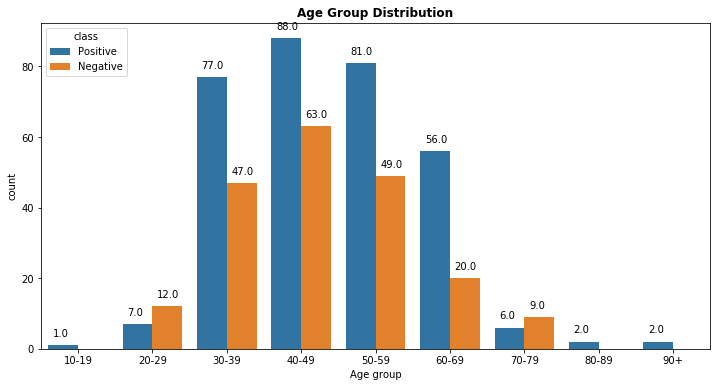

In [15]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df1, x='Age group', hue='class',
              order=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.06, p.get_height()+2.5))
plt.title('Age Group Distribution', fontweight='bold')

### 4. Class by Gender Distribution
By using the gender as hue in the class distribution, we can see that **`Females` turned out to be more `Positive`**.

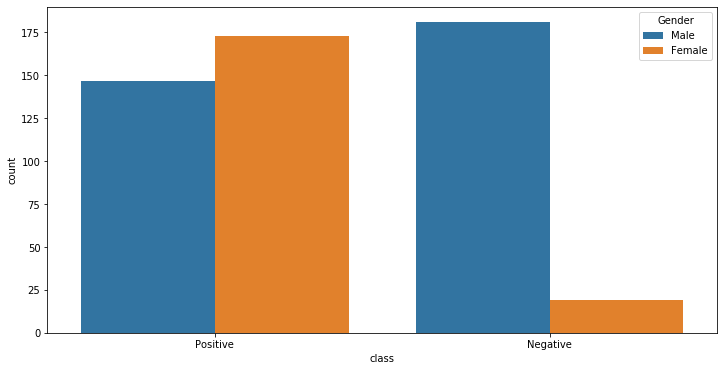

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df1, x='class', hue='Gender')

### 5. Symptoms Distribution
**The distribution of the rest of the feature** can be seen below, displayed in a pie chart for ease of viewing and understanding.

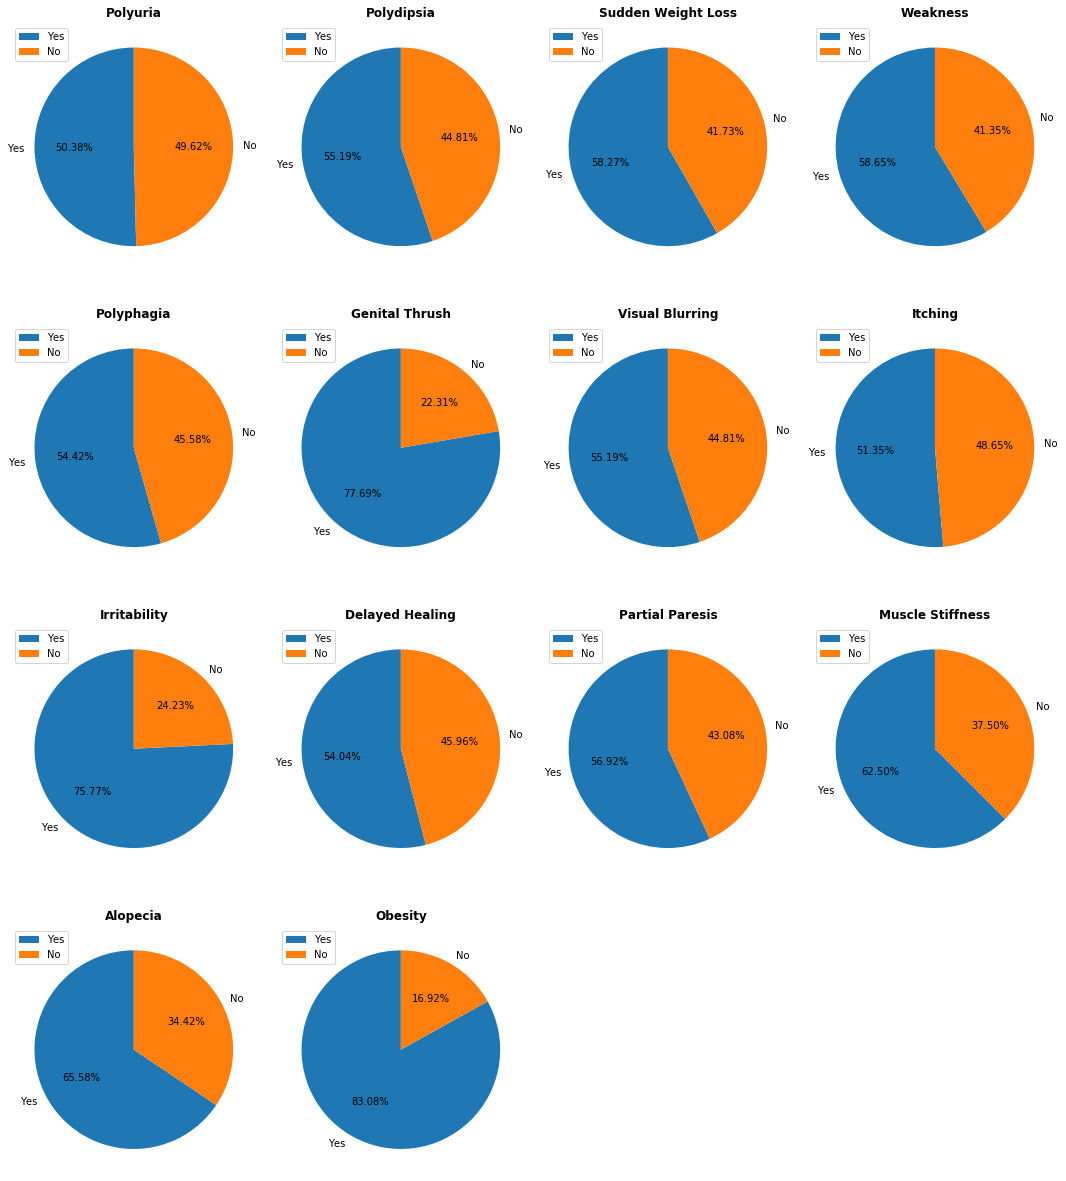

In [17]:
pc = 1
plt.figure(figsize=(15,17))
print('\n\n')
for i in df1.drop(['class', 'Age', 'Gender', 'Age group'], axis=1).columns:
    plt.subplot(4,4,pc)
    plt.title(f'{i.title()}', fontweight='bold')
    pc += 1
    df1[i].value_counts().plot(kind="pie", legend=True, labels=["Yes","No"],
    startangle=90, autopct='%.2f%%')
    plt.ylabel('')
    plt.legend(loc='upper left')
plt.tight_layout() 
plt.show()

### 6. Correlation
A calculation of correlation between the features are made in order **to know which features have a correlation between each other**. The result of calculating the correlation can be seen on the heatmap correlation below. Correlation with the value near 1.0 means the features have correlation, while value near 0 have no correlation.

**`Polydipsia` and `Polyuria` can be seen that they has some correlation**, with the value of 0.6. This may be due to both of the symptoms are revolving around conditions which cause the body to urinate more.

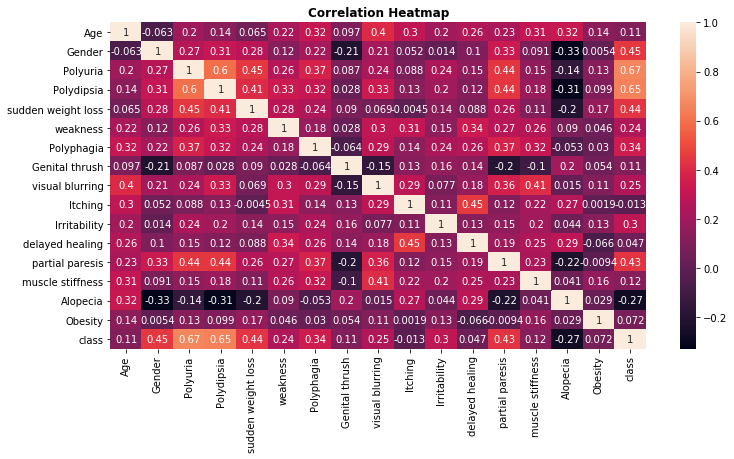

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

Below is the summary of correlations between `class` and other features. From here we can see which features have correlation or have impact to `class`.

In [19]:
(df.corr()['class'].sort_values(ascending=False)).round(2)

class                 1.00
Polyuria              0.67
Polydipsia            0.65
Gender                0.45
sudden weight loss    0.44
partial paresis       0.43
Polyphagia            0.34
Irritability          0.30
visual blurring       0.25
weakness              0.24
muscle stiffness      0.12
Genital thrush        0.11
Age                   0.11
Obesity               0.07
delayed healing       0.05
Itching              -0.01
Alopecia             -0.27
Name: class, dtype: float64

## D. Modelling
In this process, we will go through several steps **to find the optimal model** to predict and rank the importance between features that are going to be analyzed. In building this model, **the train data or x will include all the features except `class`, while the target or y will be `class` itself**.

In [20]:
x = df.drop('class', axis=1)
y = df['class']

In [21]:
y.value_counts()

1    320
0    200
Name: class, dtype: int64

### Train Test Split
First, the data will have to be **split into 2 subsets which are train data and test data**. As the name implies the data will be used for different purpose which are training and testing. The testing subset is for building the model and the testing subset is used for the model on unknown data to evaluate the performance of the model.

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101)

### Library Import

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

We are going to use **classification algorithms** for the model that we are going to make because the model is going to predict a result of binary value, which are Yes or No. The algorithms that we will be using are:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Ada Boosting Classifier
5. Gradient Boosting Classifier
6. Support Vector Classifier
7. K-Nearest Neighbors

### Base Model

In [24]:
models = {
    'Logistic Regression':  LogisticRegression(max_iter=1000),
    'Decision Tree Classifier':  DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier()
}

In this process we will **fit and score each of the models** to find which of the models have the best base score. In this process we will be using a seed so that the result won't change everytime we run the code.

In [25]:
def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    np.random.seed(101)

    model_scores = {}
    for name, model in models.items():
        model.fit(xtrain,ytrain)
        model_scores[name] = model.score(xtest,ytest)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score', ascending=False)
        
    return model_scores

In [26]:
base_model_scores = fit_and_score(models, xtrain, xtest, ytrain, ytest)

In [27]:
base_model_scores

,Score
Random Forest Classifier,0.993590
Decision Tree Classifier,0.961538
Gradient Boosting Classifier,0.961538
AdaBoost Classifier,0.923077
Logistic Regression,0.916667
K-Nearest Neighbors Classifier,0.865385
Support Vector Classifier,0.615385


From the chart below and the result of the fitting and scoring seen above, we can see that the **`Random Forest Classifier` have the highest score compared to the rest of the models**. We then will choose to take a more in-depth look at the Random Forest Classifier.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

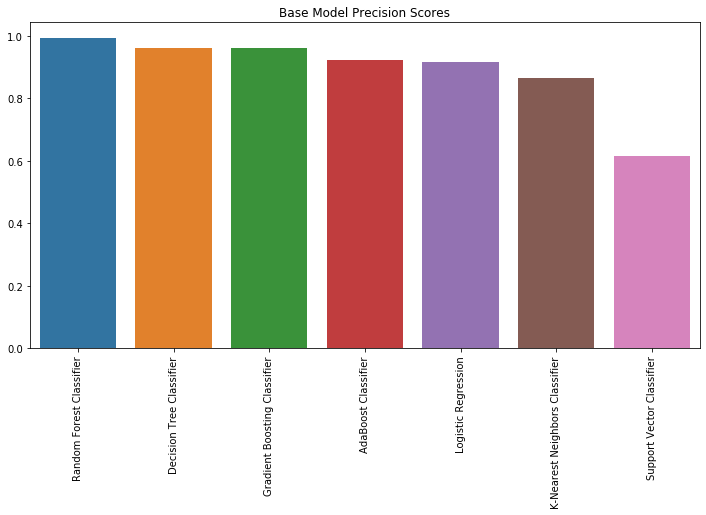

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=base_model_scores.T)
plt.title('Base Model Precision Scores')
plt.xticks(rotation=90)

In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from warnings import filterwarnings

### Base Model - Random Forest Classifier
We have chosen the **`Random Forest Classifier` as our base model** for the rest of the process in modeling. The classification report and confusion matrix plot can be seen below.

In [30]:
rf_base_model = RandomForestClassifier()
rf_base_model.fit(xtrain, ytrain)
ypred = rf_base_model.predict(xtest)

In [31]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.99      0.99      0.99        96

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



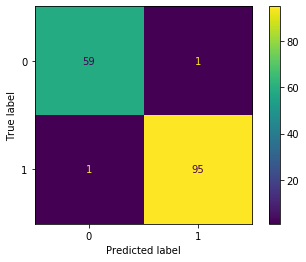

In [32]:
plot_confusion_matrix(rf_base_model, xtest, ytest)

### Grid Search CV
Grid Search CV is an **exhaustive search over specified parameter values for an estimator**. This purpose of this process is to find the most suitable parameters for our model. The parameters that we are going to search for are number of estimators, criterion, bootstrap, and oob score.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {
    'n_estimators': [60,80,100],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'oob_score':  [True, False]
}

In [35]:
filterwarnings('ignore')
rfgs_model = GridSearchCV(RandomForestClassifier(random_state=101), params, scoring='precision', cv=5, verbose=1)
rfgs_model.fit(xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   12.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [60, 80, 100],
                         'oob_score': [True, False]},
             scoring='precision', verbose=1)

In [36]:
ypred = rfgs_model.predict(xtest)

In [37]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.99      1.00      0.99        96

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



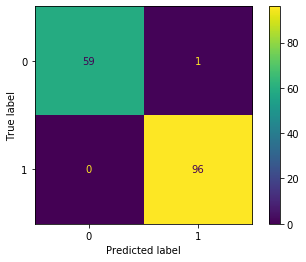

In [38]:
plot_confusion_matrix(rfgs_model, xtest, ytest)

In [39]:
rfgs_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 80,
 'oob_score': True}

### Final Model
From the Grid Search CV testing, we have found our final model. We will be using this model to predict and rank the importance of features. We have decided to use the **`Random Forest Classifier` with the following hyperparameters**:
- bootstrap = True
- criterion = entropy
- number of estimators = 80
- oob score = True

In [40]:
model = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=80, oob_score=True, random_state=101)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

### Feature Importances
By ranking the feature importances we can **identify what factors that have the most impact** to having diabetes or not. Feature importance is a technique that assign a score to input features based on how useful they are at predicting a target variable.

In [41]:
feature_imp = pd.DataFrame()
feature_imp['columns'] = x.columns
feature_imp['importances'] = model.feature_importances_
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
3,Polydipsia,0.211727
2,Polyuria,0.190348
0,Age,0.095919
1,Gender,0.084914
12,partial paresis,0.061666
14,Alopecia,0.050842
4,sudden weight loss,0.045862
10,Irritability,0.038718
9,Itching,0.036329
11,delayed healing,0.036025


<Figure size 864x432 with 0 Axes>

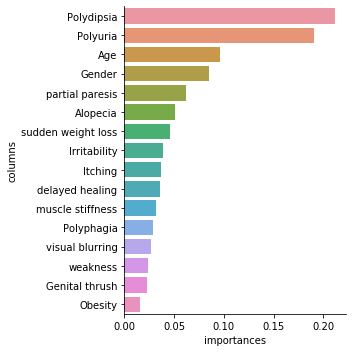

In [42]:
plt.figure(figsize=(12,6))
sns.catplot(y='columns', x='importances', data=feature_imp.sort_values(by='importances', ascending=False), kind='bar')
plt.tight_layout()

By looking at the graph above, we can see how much each of the feature affects the model prediction. **`Polydipsia` is identified to be the most important feature while `Obesity` is identified to be the least important**.

### Result and Conclusion

- The model that is used to predict the early stage diabetes risk is a **Random Forest Classifier** with with the hyperparameters which are bootstrap = True, criterion = entropy, number of estimators = 80, and oob score = True. This model can be used to predict the risk of early stage diabetes with a high precision score of 99%.
- As a consulting company engaged in IT and Data Science, we can help our client by collecting or cleaning the data, making an optimal model to predict future data, giving suggestions from the insight we found, and maybe creating visualization from the data that the client have given to us.